# Linear Regression 

![Alt text](LR.png)  

In machine learning, the linear regression model is trained on a set of input-output pairs (also known as training data) to learn the optimal values of the model parameters (slope and intercept) that minimize the difference between the predicted output and the actual output.

The performance of the linear regression model is evaluated using a metric such as mean squared error (MSE) or root mean squared error (RMSE), which measures the average difference between the predicted output and the actual output.

$MSE = \frac{1}{m} \sum_{i =1}^m $


$RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2}$

Linear regression can be used for a variety of applications such as predicting stock prices, housing prices, and customer churn rates. It is a simple yet powerful algorithm that provides a good baseline for more complex machine learning models.  



In [8]:
import numpy as np
import matplotlib.pylab as plt
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import plotly.express as px
import seaborn as sns

In [4]:
medical = pd.read_csv('/Users/weitaoran/Desktop/rice/inde577/INDE577/supervised-learning/Linear-Regression/insurance.csv')
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [7]:
medical.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing value, no NaN, pretty good. We could go ahead on visualize the dataset. We look at the numerical values. 

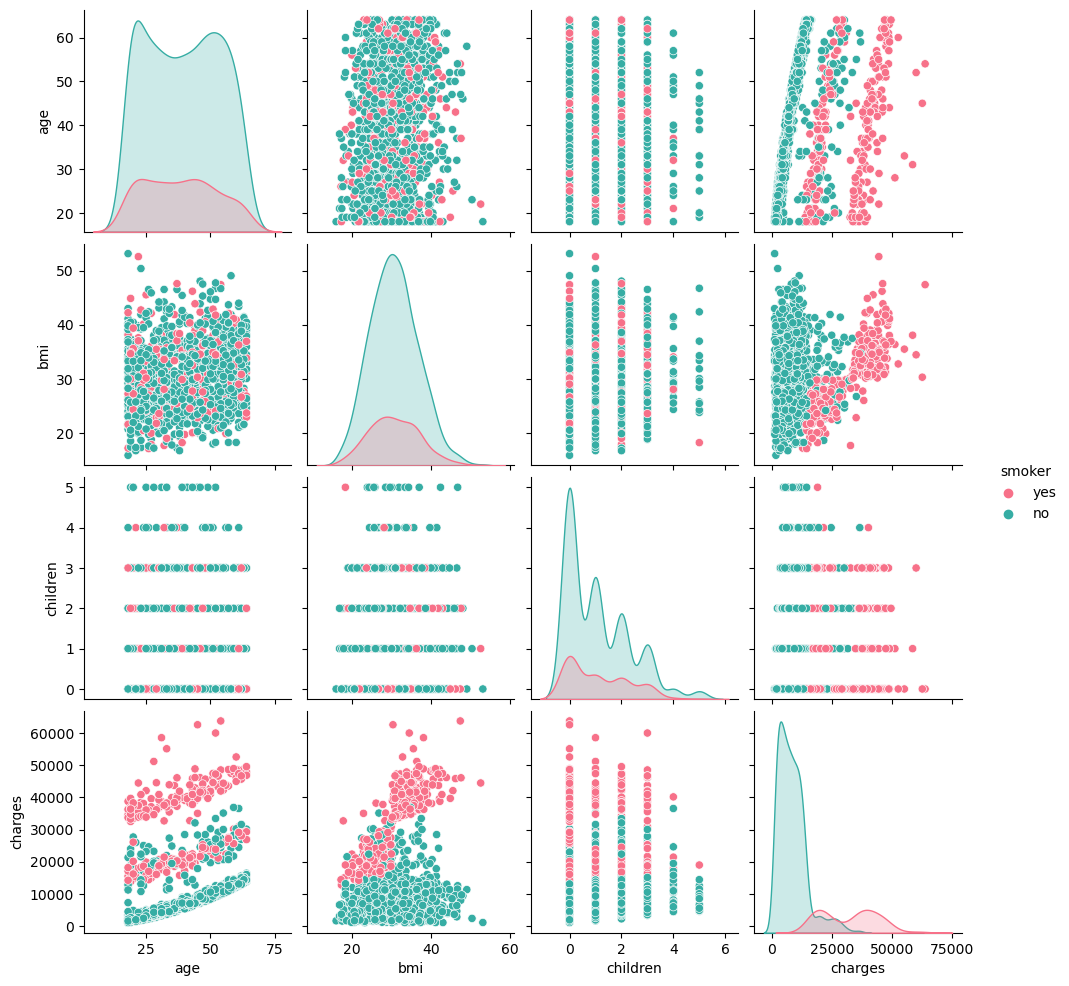

In [9]:

sns.pairplot(medical, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

Make dummy variables of categorical variables. 

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(medical.sex.drop_duplicates())
medical.sex = label.transform(medical.sex)
label.fit(medical.smoker.drop_duplicates())
medical.smoker = label.transform(medical.smoker)
label.fit(medical.region.drop_duplicates())
medical.region = label.transform(medical.region)
medical.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

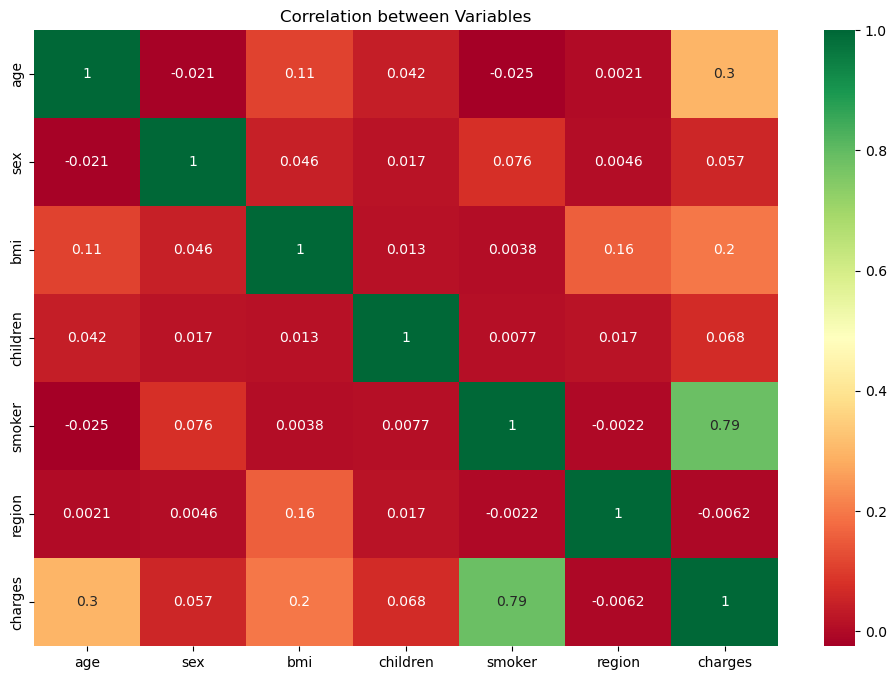

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(medical.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

Split train and test dataset, contrast linear model and get statistic summary like coefficient, rmse, $r^2$

In [29]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = medical.drop(['charges'], axis = 1)
y = medical['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
            Lin_reg, 
            x_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)
rmse_scores = np.sqrt(-scores)

print ('rmse_scores:', rmse_scores)


-11661.983908824428
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.799874714544996
rmse_scores: [6125.6414336  6024.61540022 4636.70121355 6649.89200476 6180.20336774
 5622.47188008 6765.47188711 5553.41077123 6968.55355155 6960.3316571 ]


/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


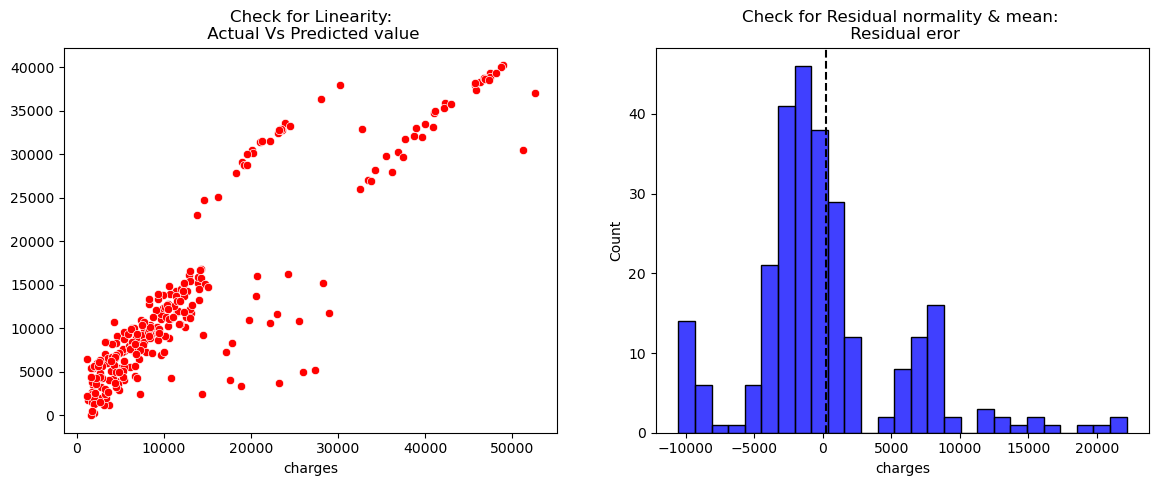

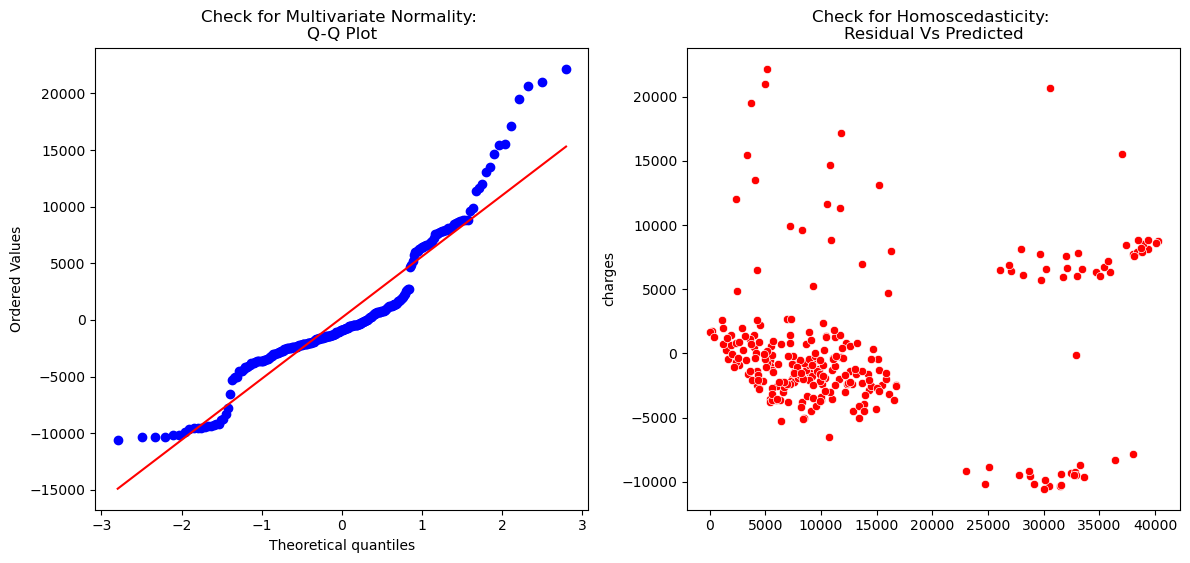

In [41]:
# Check for Linearity
y_pred = Lin_reg.predict(x_test)
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')

f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');
plt.show()

Could say that assumptions of linear regression are passed. 